# Exploratory data analysis (EDA)
## Exploring Rossmann Pharmaceuticals' dataset 

## Importing the relevant libraries

In [9]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')

In [10]:
#we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')
import dvc.api

### Importing scripts & modules 

In [11]:
from helper import MyHelper
from cleaner import MyCleaner
from logger import App_Logger

import utility
import plots

### Initializing logging functionality

In [12]:
logger = App_Logger("EDA_Logs.log").get_app_logger()

### Loading the data

In [13]:
train_PATH = "../data/train.csv"
test_PATH = "../data/test.csv"
store_PATH = "../data/store.csv"
sample_PATH = "../data/sample_submission.csv"

In [14]:
# the class has utility function we are going to use
Helper = MyHelper()

In [15]:
# we use our helper function to read csv data
df_train = Helper.read_csv(train_PATH)
df_test = Helper.read_csv(test_PATH)
df_store = Helper.read_csv(store_PATH)
df_sample = Helper.read_csv(sample_PATH)

>> file read as csv
>> file read as csv
>> file read as csv
>> file read as csv


### DVC Data get by version 

In [20]:
def get_data(tag, 
            path='data/train.csv', 
            repo ='C:/Users/euelf/Desktop/10_AC_CHALLENGES/Week_3/Rossmann_Pharmaceuticals'
            ):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

# Inspecting the data

## 1. Train data

In [7]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
#Checking missing values 
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## 2. Test data

In [9]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [10]:
#Checking missing values 
df_test.isnull().sum()

## WE CAN SEE THAT OPEN COLUMN HAS 11 missing vlaues

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

## 3. Store data

In [11]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
#Checking missing values 
df_store.isnull().sum()

# WE SEE THAT store has some missing vlaues

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## 4. Sample_submission data

In [13]:
df_sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## Field Ddescriptions 

__Id__ - an Id that represents a (Store, Date) duple within the test set

__Store__ - a unique Id for each store

__Sales__ - the turnover for any given day (this is what you are predicting)

__Customers__ - the number of customers on a given day

__Open__ - an indicator for whether the store was open: 0 = closed, 1 = open

__StateHoliday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

__SchoolHoliday__ - indicates if the (Store, Date) was affected by the closure of public schools

__StoreType__ - differentiates between 4 different store models: a, b, c, d

__Assortment__ - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here

__CompetitionDistance__ - distance in meters to the nearest competitor store

__CompetitionOpenSince[Month/Year]__ - gives the approximate year and month of the time the nearest competitor was opened

__Promo__ - indicates whether a store is running a promo on that day

__Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

__Promo2Since[Year/Week]__ - describes the year and calendar week when the store started participating in Promo2

__PromoInterval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# Merging 'train.csv' and 'store.csv'

## Both dataset have common column 'store' 
## We use that column to merge store into train dataset

In [14]:
train = pd.read_csv('../data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("../data/store.csv", 
                    low_memory = False)

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

#data_frame = pd.read_csv("train.csv")
train = pd.read_csv('../data/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("../data/store.csv", 
                    low_memory = False)

train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,2013-01-05,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,2013-01-04,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,2013-01-03,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,2013-01-02,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Data wrangling begins here..

 Descriptive statistics are very useful for initial exploration of the variables
 By default, only descriptives for the numerical variables are shown
 To include the categorical ones, you should specify this with an argument
 Note that categorical variables don't have some types of numerical descriptives
 and numerical variables don't have some types of categorical descriptives

In [15]:
#Checkinig the missing values
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

__Competition Distance__

Before deciding how to treat this,we know there are infinite ways of filling missing values.
The most common and simplistic approach is to fill it with either the mean or the median of this variable.

In [16]:
train_store[pd.isnull(train_store.CompetitionDistance)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
263244,291,5,10052,973,1,1,0,1,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263245,291,4,9030,883,1,1,0,1,2015,7,...,2015-07-30,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263246,291,3,8204,814,1,1,0,1,2015,7,...,2015-07-29,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263247,291,2,10374,943,1,1,0,1,2015,7,...,2015-07-28,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263248,291,1,11692,1086,1,1,0,1,2015,7,...,2015-07-27,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN


In [17]:
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
df_store_check_distribution.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


* Let's quickly have a look at those metrics.

{'Mean': 5430.085652302903,
 'Median': 2330.0,
 'Standard Dev': 7715.319897995119}

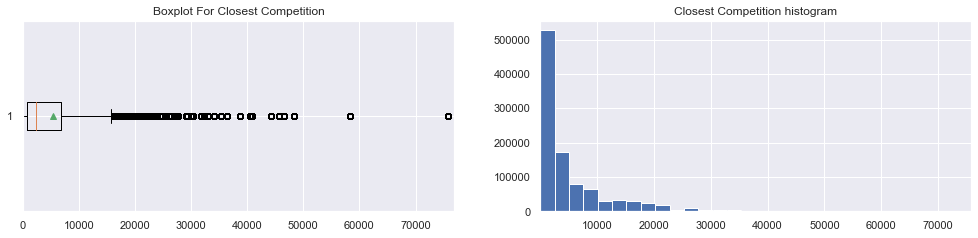

In [18]:
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(train_store.CompetitionDistance),"Median":np.nanmedian(train_store.CompetitionDistance),"Standard Dev":np.nanstd(train_store.CompetitionDistance)}
#That's what i thought, very different values, let's see why 

We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

**What do we do then?**

It is realistically better to input the median value to the Nan stores then the mean since the mean is biased by those outliers.

In [19]:
train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)

__CompetitionOpenSinceMonth and CompetitionOpenSinceYear__

Since we have no information whatsoever on those missing values and no accurate way of filling those values.
So those fields are going to be assigned to 0 .

In [20]:
train_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

__Promo2SinceWeek, Promo2SinceYear and PromoInterval__ 

This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.
Having no promotion means those fields have to be 0 as well since they are linked to Promo2.


In [21]:
train_store.Promo2SinceWeek.fillna(0,inplace=True)
train_store.Promo2SinceYear.fillna(0,inplace=True)
train_store.PromoInterval.fillna(0,inplace=True)


__StateHoliday__


In [22]:
train_store.StateHoliday.fillna(0,inplace=True)

In [23]:
utility.percent_missing(train_store)

The dataset contains 0.0 % missing values.


In [24]:
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


## Reading the description report 

### Sales

The __minimum sale__ is 0

The __maximum sale__ is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

### Customers

The __minimum customer__ is 0

The __maximum customer__ is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [25]:
cleaned_df = train_store.copy()

## Probability distribution function (PDF)

### Sales Distribution

Text(0.5, 1.0, 'Sales Distribution')

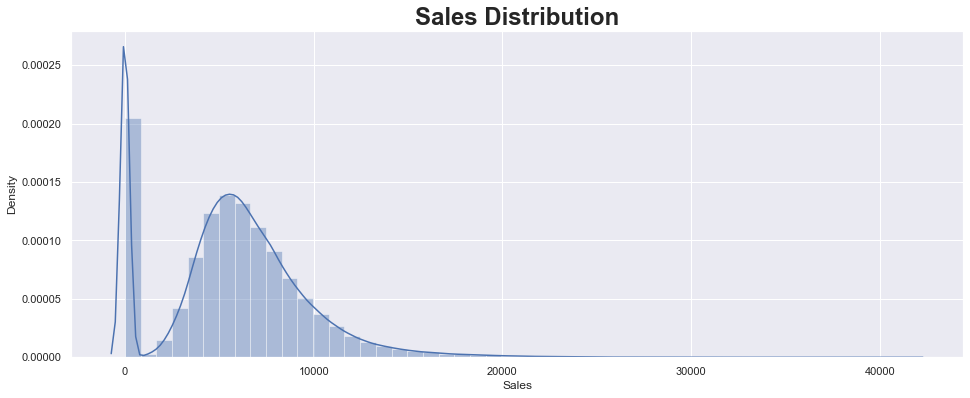

In [26]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

### Customers Distribution

Text(0.5, 1.0, 'Customers Distribution')

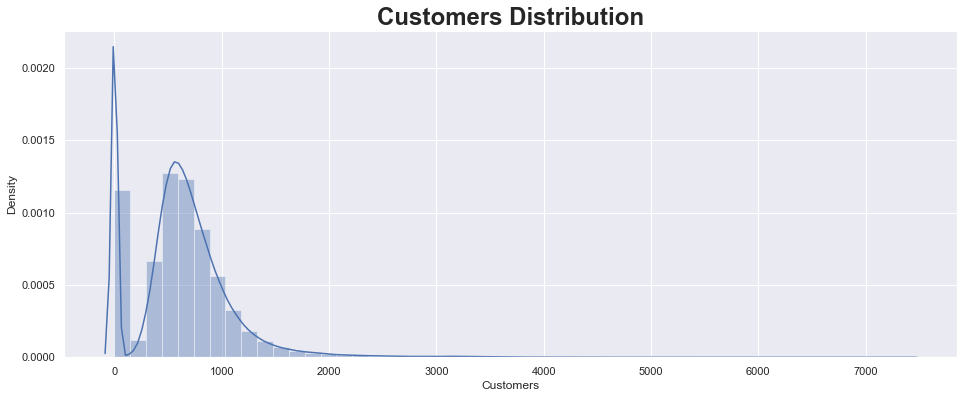

In [27]:
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

### We can see that there are some outliers in sales and customers distribuiton
### let's check it with boxplot


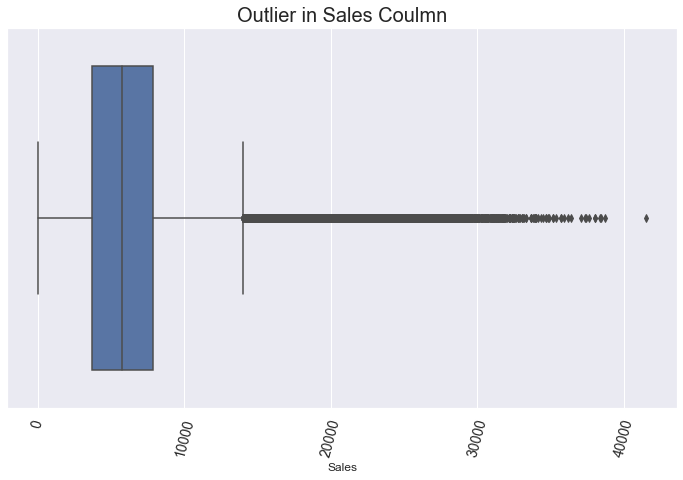

In [28]:
plots.plot_box(cleaned_df, 'Sales','Outlier in Sales Coulmn')

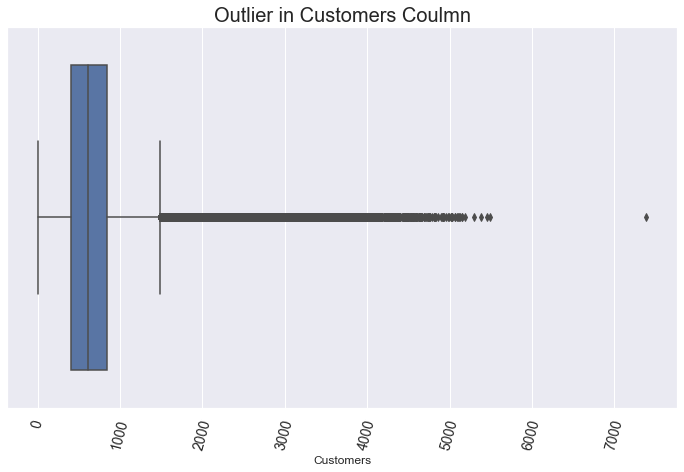

In [29]:
plots.plot_box(cleaned_df, 'Customers','Outlier in Customers Coulmn')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

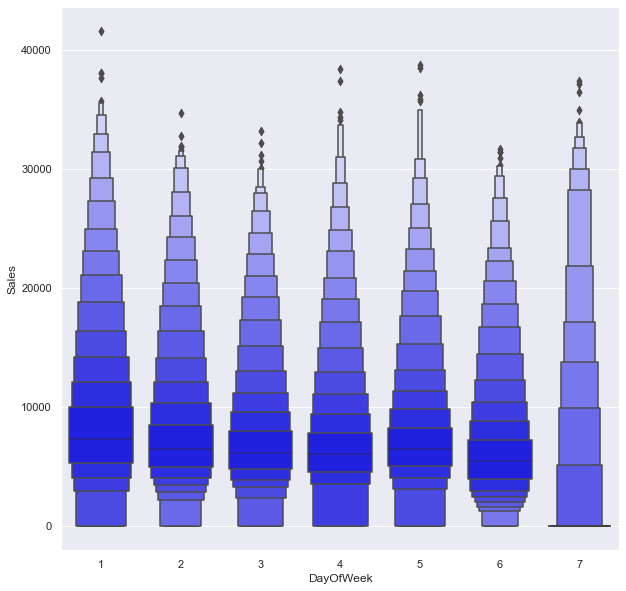

In [30]:
plt.figure(figsize=(10,10))
sns.boxenplot(data=cleaned_df,scale="linear",x="DayOfWeek",y="Sales",color="Blue")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

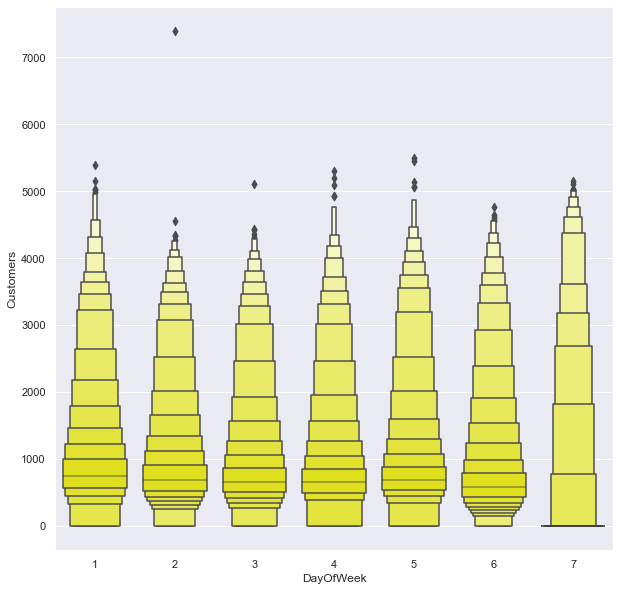

In [31]:
plt.figure(figsize=(10,10))
sns.boxenplot(y="Customers", x="DayOfWeek",data=cleaned_df, scale="linear",color="Yellow")

This data, contains many outliers, but these might have been caused to the surge of customers during a festival or Holiday, or due to an effective promo. Below we are handle the outliers

In [32]:
# we user our cleanTelecomData class to clean our data
# note: you can find the implmentation of CleanTelecomData inside scripts folder

# cleaner = MyCleaner(cleaned_df)

In [33]:
# cleaned_df = cleaner.replace_outlier_with_median('Sales')

In [34]:
#Treating the outliers 
  # a function for replacing outliers with the median, used when there's too many outliers in a feature
def replace_outlier_with_median(dataFrame, feature):
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

In [35]:
replace_outlier_with_median(cleaned_df, 'Sales')

In [36]:
replace_outlier_with_median(cleaned_df, 'Customers')

# Visual Inspection 

###  DayOfWeek, Open vs closed distribution

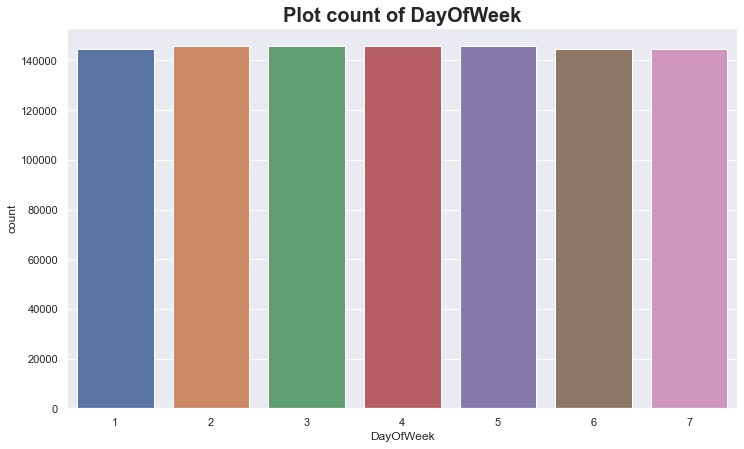

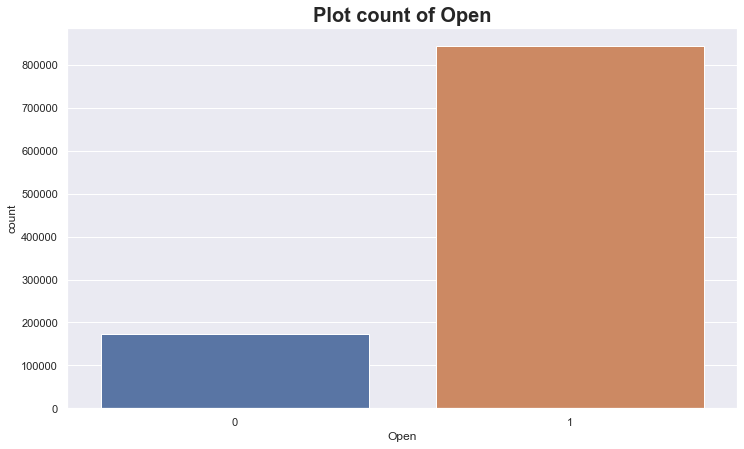

In [37]:
#ploting distribution using plot_count method
plots.plot_count(cleaned_df,'DayOfWeek')
plots.plot_count(cleaned_df, 'Open')

### State Holiday School Holidays & Promo 

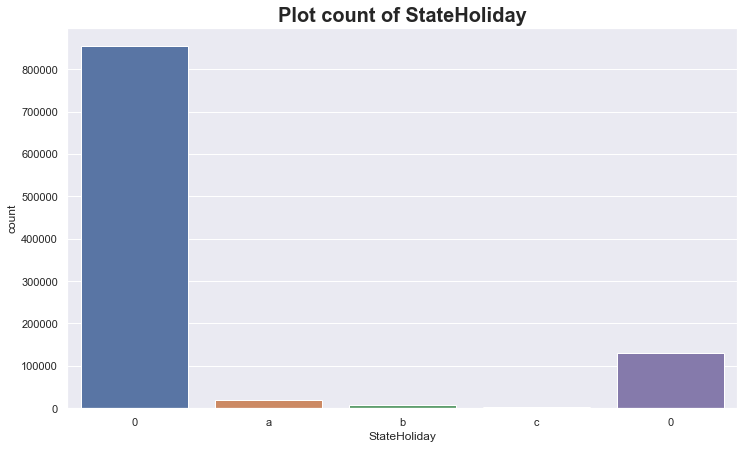

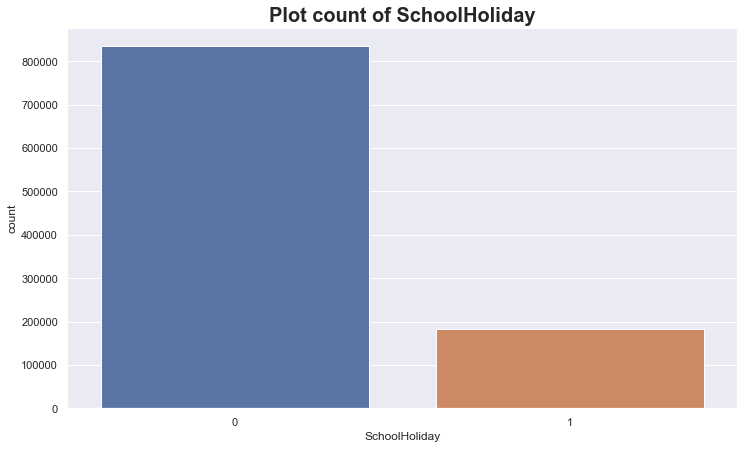

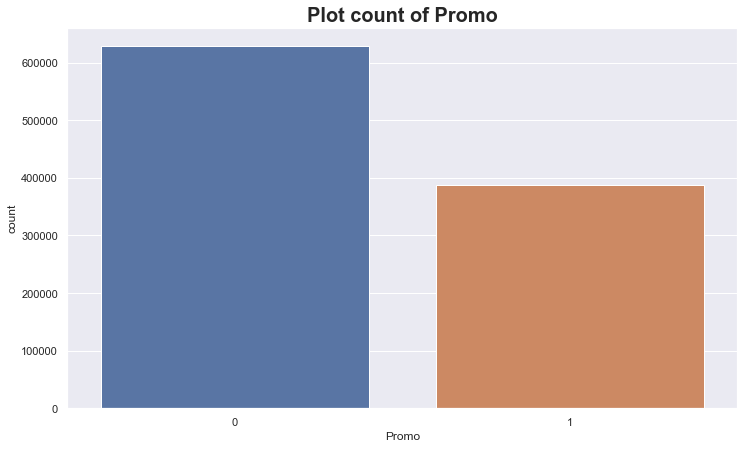

In [38]:
plots.plot_count(cleaned_df, 'StateHoliday')
plots.plot_count(cleaned_df, 'SchoolHoliday')
plots.plot_count(cleaned_df, 'Promo')

### Store distribution

<Figure size 648x504 with 0 Axes>

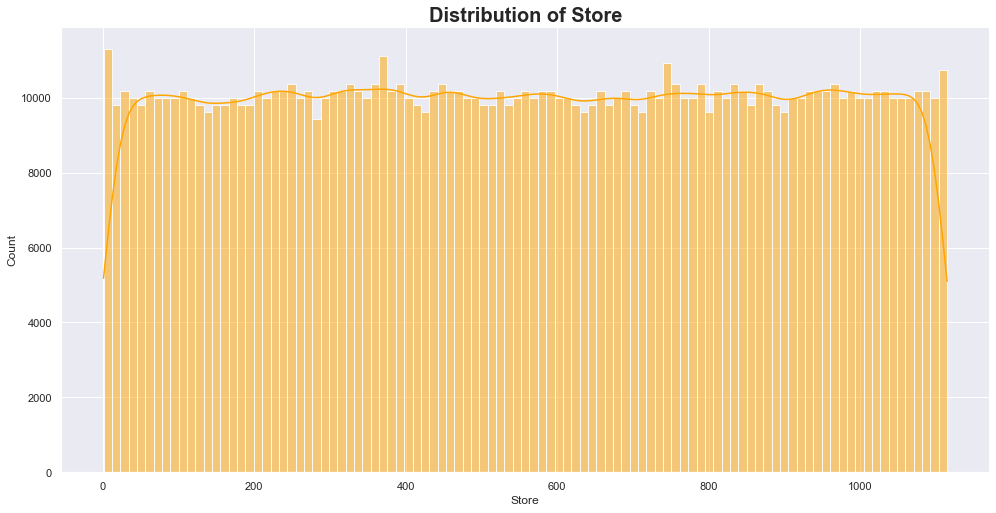

In [39]:
plots.plot_hist(cleaned_df, 'Store', 'orange')

### Year, Month & WeekOfYear distribution

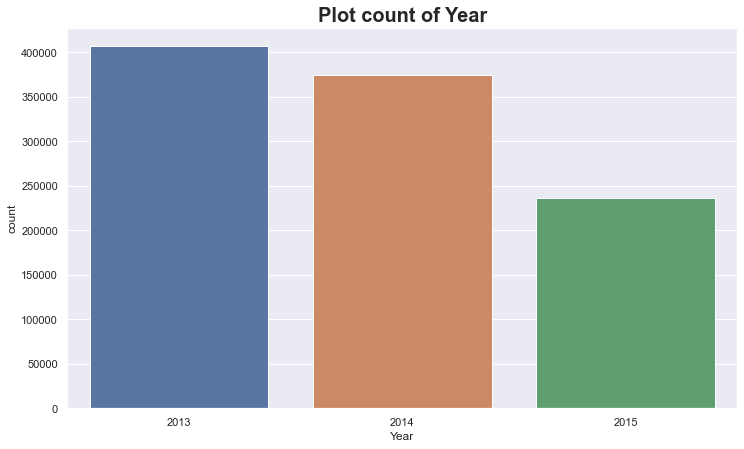

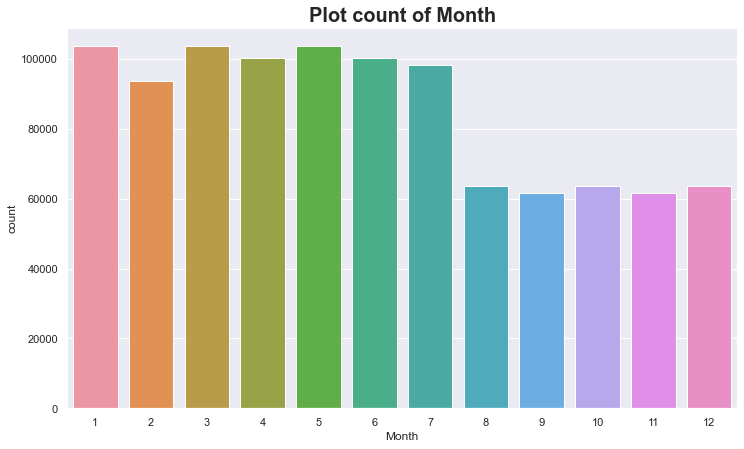

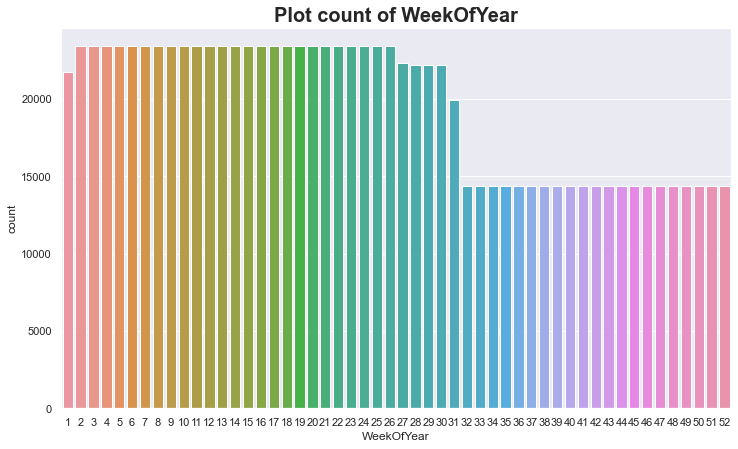

In [40]:
plots.plot_count(cleaned_df, 'Year')
plots.plot_count(cleaned_df, 'Month')
plots.plot_count(cleaned_df, 'WeekOfYear')


### StoreType, Assortment and Promo2 distribution

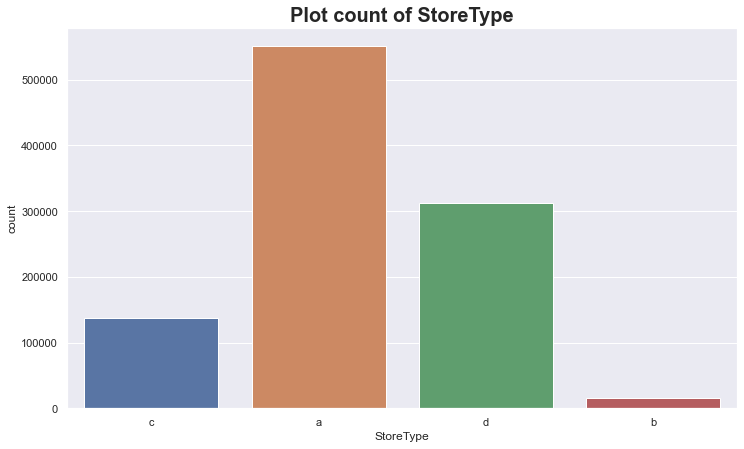

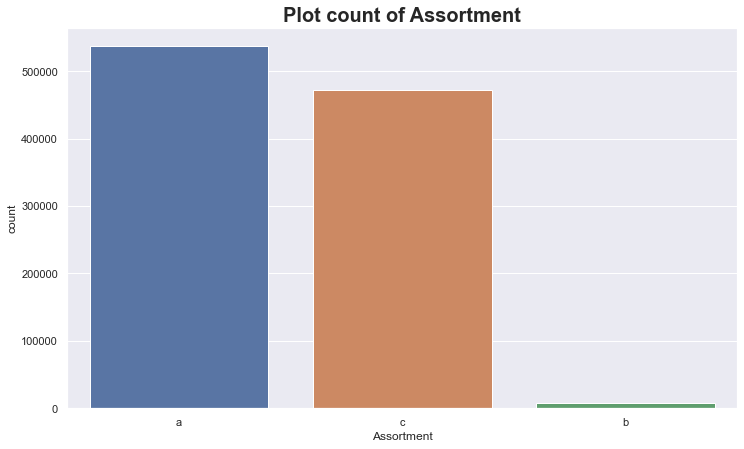

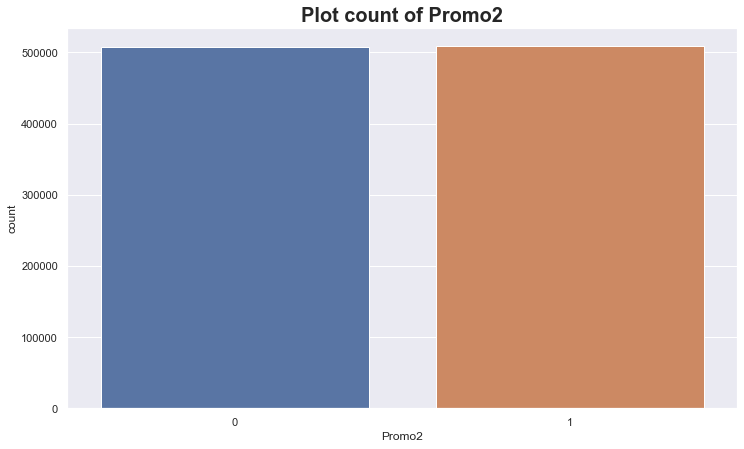

In [41]:
plots.plot_count(cleaned_df, 'StoreType')
plots.plot_count(cleaned_df, 'Assortment')
plots.plot_count(cleaned_df, 'Promo2')

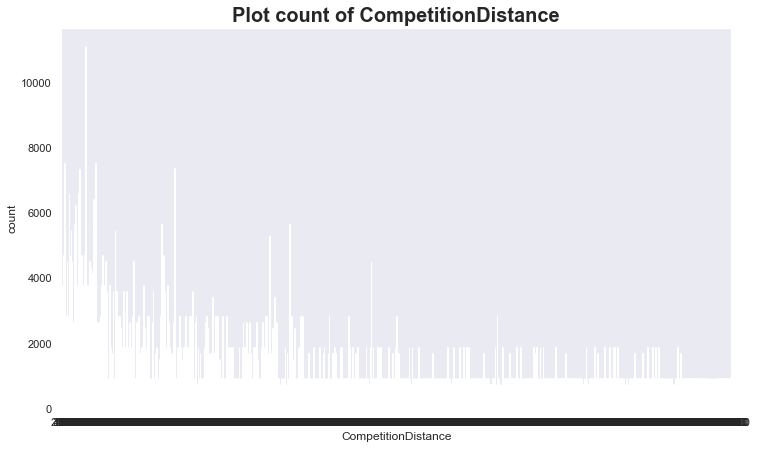

In [42]:
sns.set(style="dark")
plots.plot_count(cleaned_df, 'CompetitionDistance')


Text(0.5, 1.0, 'Customers Distribution')

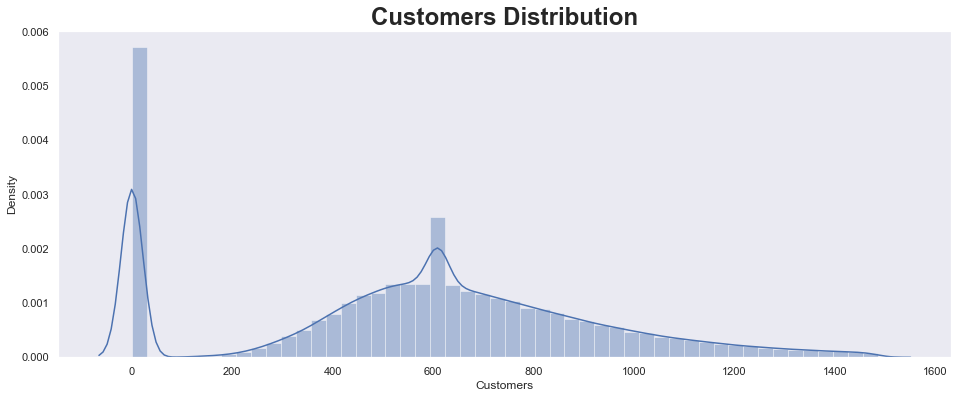

In [43]:
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

Text(0.5, 1.0, 'Sales Distribution')

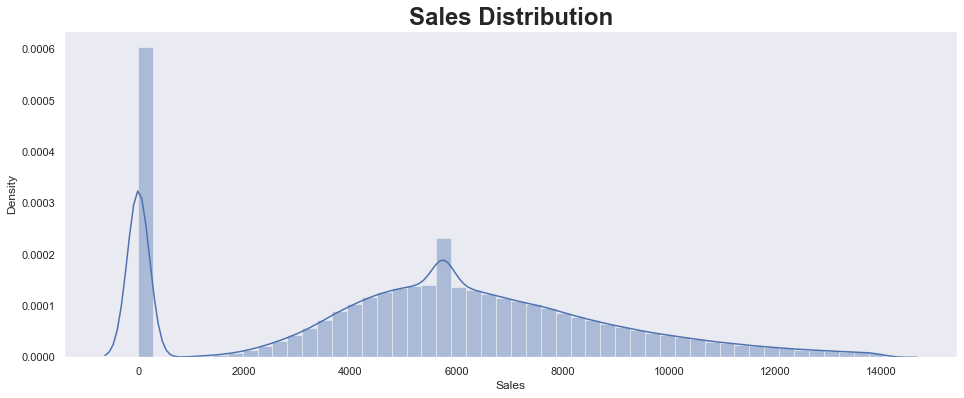

In [44]:
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

__Feature Engeneering__

Generating new features from already existing features.

In [45]:
#Adding salespercustomer column
cleaned_df['SalesperCustomer']=cleaned_df['Sales']/cleaned_df['Customers']

In [46]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


### correlation Analysis

In [47]:
df_correlation=cleaned_df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'StateHoliday', 'Assortment', 'StoreType',
       'PromoInterval']]


<AxesSubplot:>

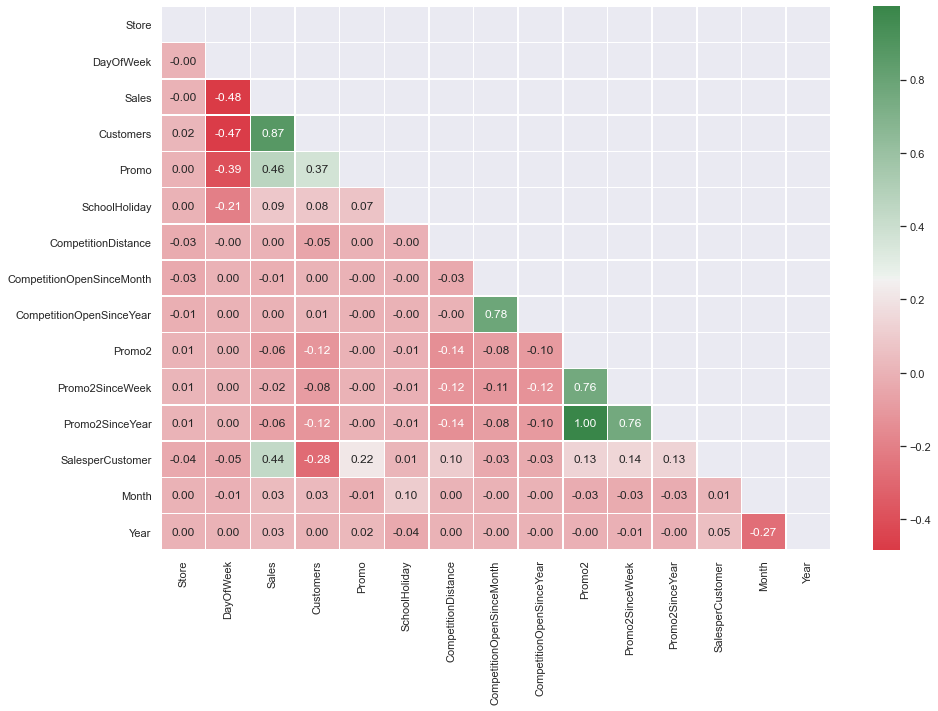

In [48]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))


In [49]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


-Since the competition variables CompetitionOpenSinceYear and CompeitionOpenSinceMonth have the same underlying meaning, merging them into one variable that we call CompetitionOpenSince makes easier for the algorithm to understand the pattern and creates less branches and thus complex trees.

In [51]:
cleaned_df['CompetitionOpenSince'] = np.where((cleaned_df['CompetitionOpenSinceMonth']==0) & 
                                                  (cleaned_df['CompetitionOpenSinceYear']==0) , 0,
                                                  (cleaned_df.Month - cleaned_df.CompetitionOpenSinceMonth) 
                                                  + (12 * (cleaned_df.Year - cleaned_df.CompetitionOpenSinceYear)) )

In [52]:
del cleaned_df['CompetitionOpenSinceYear']
del cleaned_df['CompetitionOpenSinceMonth']

In [53]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,CompetitionOpenSince
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,0,0.0,0.0,0,9.482883,82.0
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,0,0.0,0.0,0,9.194139,82.0
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,0,0.0,0.0,0,9.143403,82.0
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,0,0.0,0.0,0,8.948214,82.0
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,0,0.0,0.0,0,9.970588,82.0


In [54]:
Version_1 = "../data/train.csv"
Helper.save_csv(cleaned_df, Version_1)

>> File Successfully Saved.!!!


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,CompetitionOpenSince
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,0,0.0,0.0,0,9.482883,82.0
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,0,0.0,0.0,0,9.194139,82.0
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,0,0.0,0.0,0,9.143403,82.0
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,0,0.0,0.0,0,8.948214,82.0
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,0,0.0,0.0,0,9.970588,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771.0,339.0,1,0,0,1,2013,1,...,2013-01-05,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",14.073746,0.0
1017205,1115,5,4540.0,326.0,1,0,0,1,2013,1,...,2013-01-04,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",13.926380,0.0
1017206,1115,4,4297.0,300.0,1,0,0,1,2013,1,...,2013-01-03,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",14.323333,0.0
1017207,1115,3,3697.0,305.0,1,0,0,1,2013,1,...,2013-01-02,d,c,5350.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",12.121311,0.0


 **Data Scaling and Data Encoding**

In [21]:
train_df = get_data('train_v1')

In [22]:

class CleanTrainTestData:
    """
        this is a dataframe used to clean a dataframe
    """
    
    def __init__(self):
        pass
    
    def drop_closed_stores(self, df):
        
        try:
            cleaned = df.query("Open == 1")
            return cleaned
        except:
            pass
        
    def convert_to_datatime(self, df):  
        try:
            df['Date'] = pd.to_datetime(train_df['Date'])
            return df
        except:
            pass
    
    def sort_by_date(self, df):
        return df.sort_values(by=["Date"], ascending=False)
    
    def to_str(self, df):
        df['StateHoliday'] = df['StateHoliday'].astype(str)
        return df
    
    
    """Extracts Day Month and Year from Date"""
    def transform_date(self, df):
        
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df['Month'] = pd.DatetimeIndex(df['Date']).month
        df['Day'] = pd.DatetimeIndex(df['Date']).day
        return df

In [23]:

cleaner = CleanTrainTestData()
cleaned_train_df = cleaner.transform_date(train_df)
cleaned_train_df = cleaner.sort_by_date(cleaned_train_df)
cleaned_train_df = cleaner.to_str(cleaned_train_df)


display(cleaned_train_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
742,743,5,2015-07-31,5085,501,1,1,0,1,2015,7,31
748,749,5,2015-07-31,6612,716,1,1,0,1,2015,7,31
747,748,5,2015-07-31,7481,578,1,1,0,1,2015,7,31
746,747,5,2015-07-31,10708,826,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1016471,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016472,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016473,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016474,380,2,2013-01-01,0,0,0,0,a,1,2013,1,1
